## EDA for DS5K Capstone : Heart_Failure_Protection 

Alexandra Treml 

**Notes from Kaggle**
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Set up and familiarize with data**

In [48]:
import pandas as pd
import seaborn as sns
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm

%matplotlib inline

In [12]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [13]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
#checking the number of rows and columns in dataset
heart.shape

(299, 13)

In [11]:
#checking data types of each column 
heart.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [15]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Describing Boolean features 
 * Sex - Gender of patient Male = 1, Female =0
 * Diabetes - 0 = No, 1 = Yes
 * Anaemia - 0 = No, 1 = Yes
 * High_blood_pressure - 0 = No, 1 = Yes
 * Smoking - 0 = No, 1 = Yes
 * DEATH_EVENT - 0 = No, 1 = Yes

In [19]:
#Great! There are no null values 
def missing_values(data):
    total = df.isnull().sum().sort_values(ascending = False)
    percentage = round (total/df.shape[0]*100,2)
    return pd.concat([total, percentage],axis = 1, keys = ['Total', 'Percentage'])
missing_values(df)

,Total,Percentage
DEATH_EVENT,0,0.0
time,0,0.0
smoking,0,0.0
sex,0,0.0
serum_sodium,0,0.0
serum_creatinine,0,0.0
platelets,0,0.0
high_blood_pressure,0,0.0
ejection_fraction,0,0.0
diabetes,0,0.0


In [22]:
#also no data duplications
df.duplicated().sum()

0

**Look for patterns in the data**

In [20]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


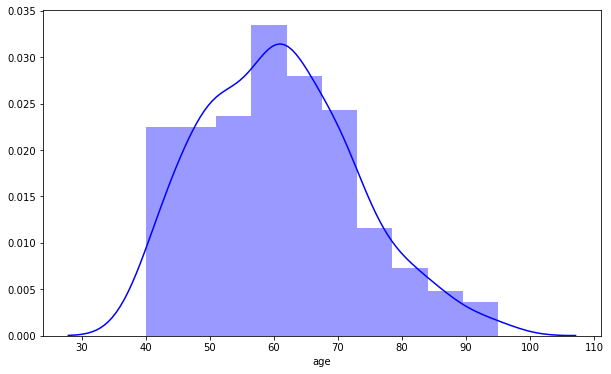

In [26]:
#age distribution of participants 
plt.figure(figsize=(10,6))
sns.distplot(df['age'], color='b')
plt.show()

<Figure size 1440x1080 with 0 Axes>

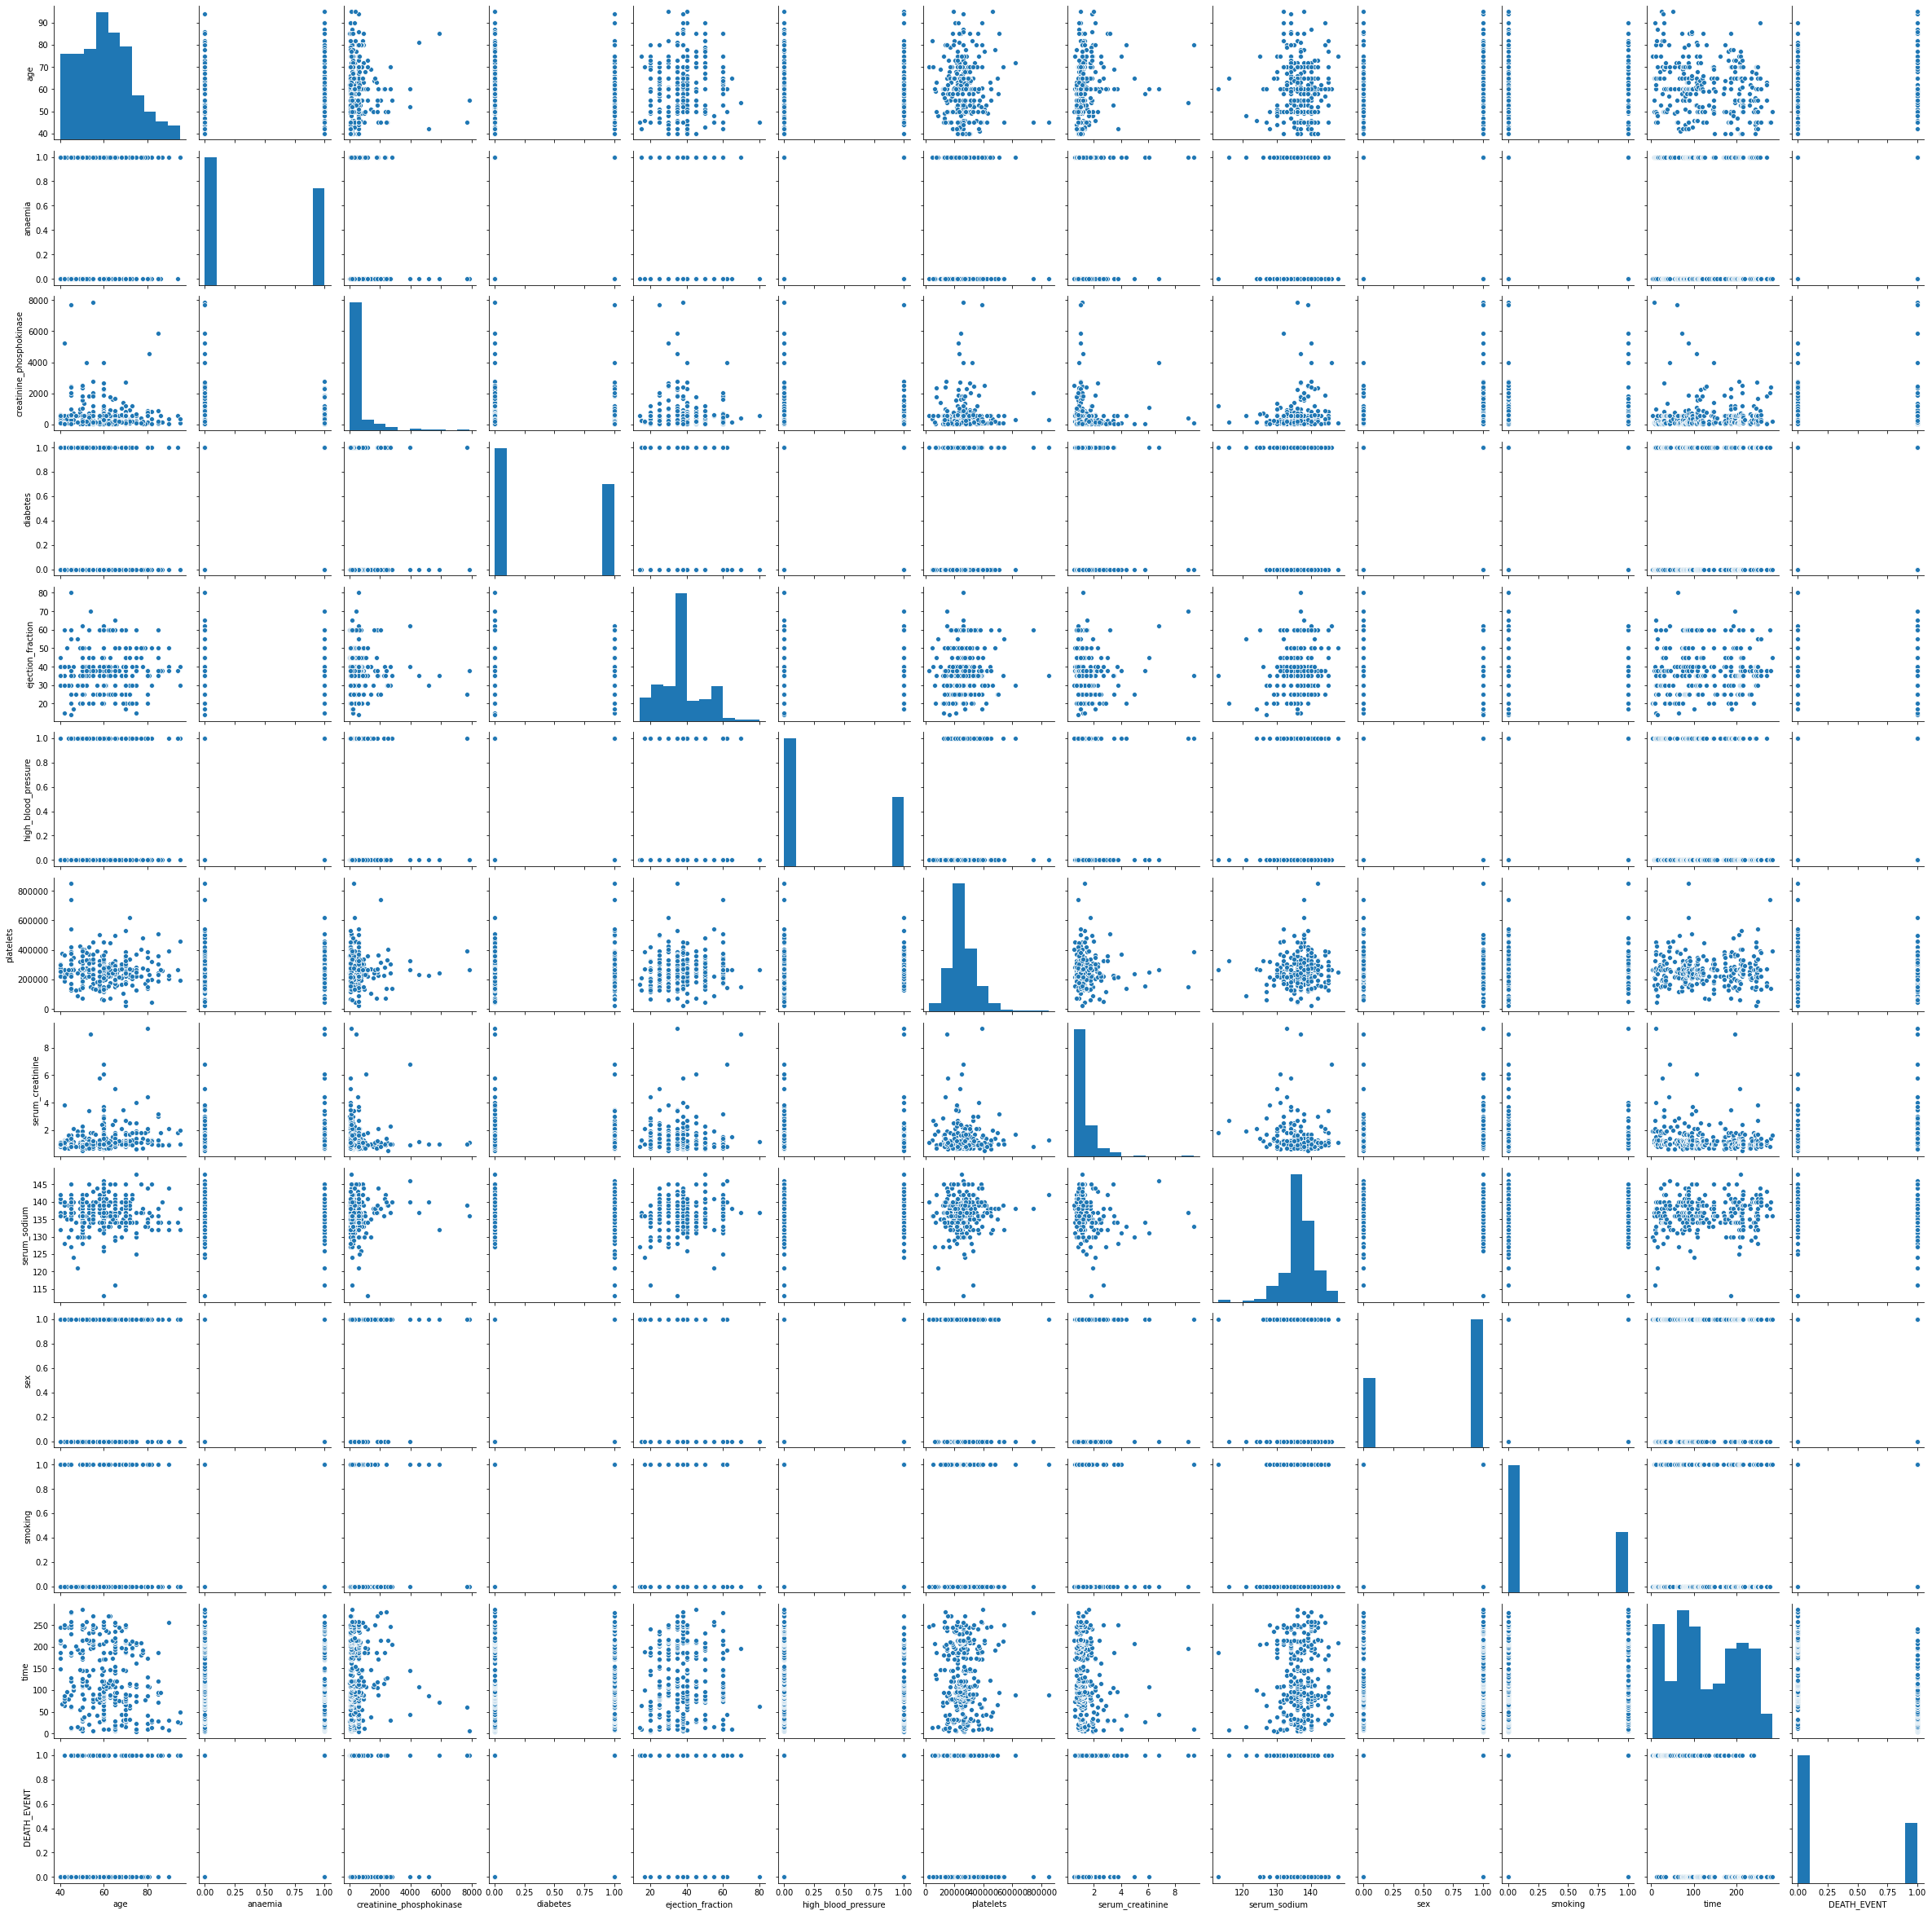

In [28]:
#plotting all numerical features
plt.figure(figsize = (20,15))
sns.pairplot(df)
plt.show()

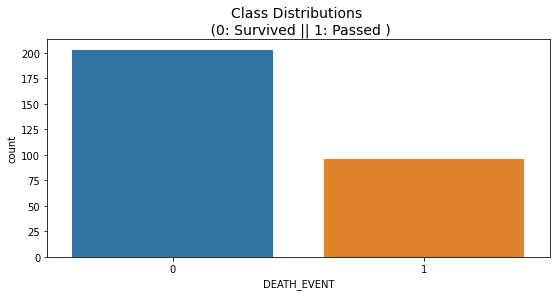

In [38]:
#how many people died by gender
plt.figure(figsize = (9,4))
sns.countplot(df['DEATH_EVENT'])
plt.title('Class Distributions \n (0: Survived || 1: Passed )', fontsize=14)
plt.show()

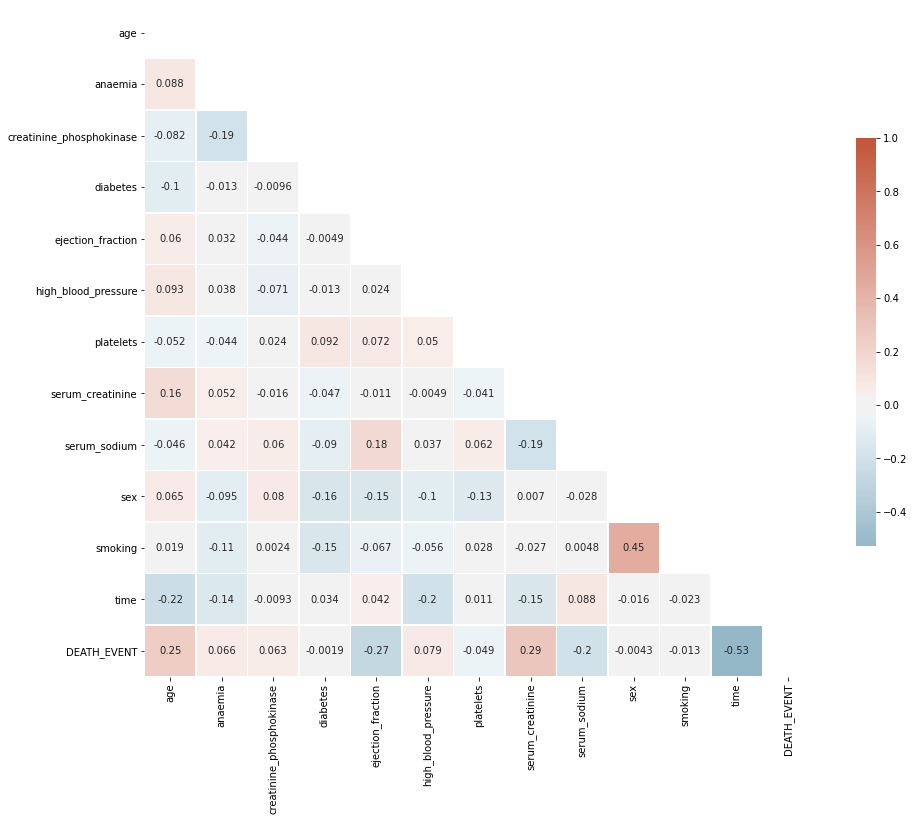

In [31]:

f, ax = plt.subplots(figsize=(15, 15))
mat = df.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

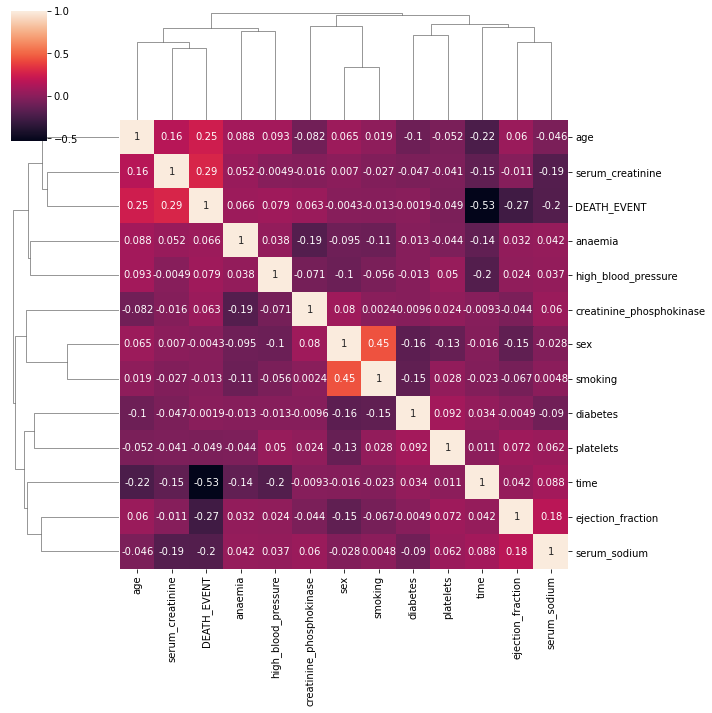

In [44]:
df.corr
#f,ax = plt.subplots(figsize=(30,30))
sns.clustermap(df.corr(), annot =True)
plt.show()

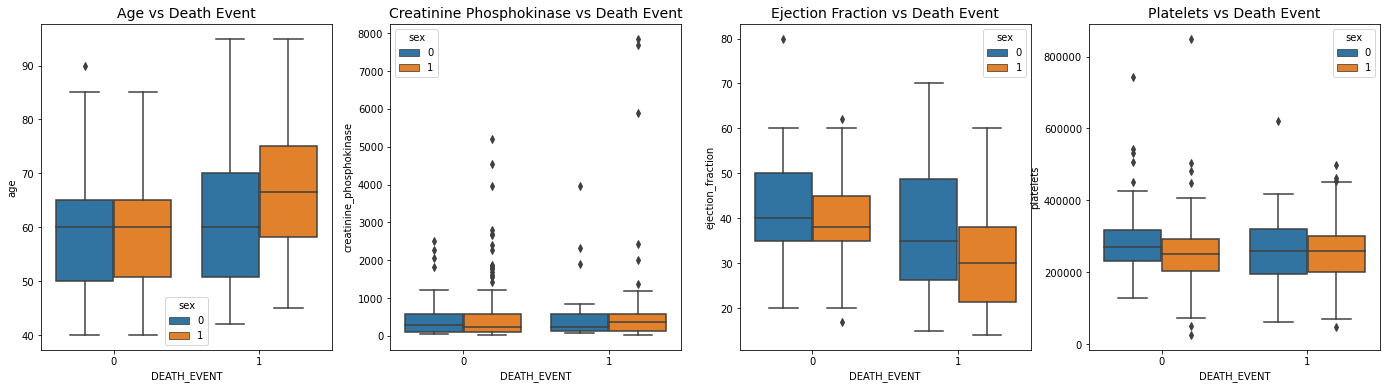

In [45]:
f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='DEATH_EVENT', y="age", data=df, hue = 'sex',ax=axes[0])
axes[0].set_title('Age vs Death Event', fontsize = 14)

sns.boxplot(x='DEATH_EVENT', y="creatinine_phosphokinase", data=df, hue = 'sex', ax=axes[1]) 
axes[1].set_title('Creatinine Phosphokinase vs Death Event', fontsize = 14)


sns.boxplot(x='DEATH_EVENT', y="ejection_fraction", data=df, hue = 'sex', ax=axes[2])
axes[2].set_title('Ejection Fraction vs Death Event', fontsize = 14)


sns.boxplot(x='DEATH_EVENT', y="platelets", data=df, hue = 'sex',ax=axes[3])  
axes[3].set_title('Platelets vs Death Event', fontsize = 14) 

plt.show()

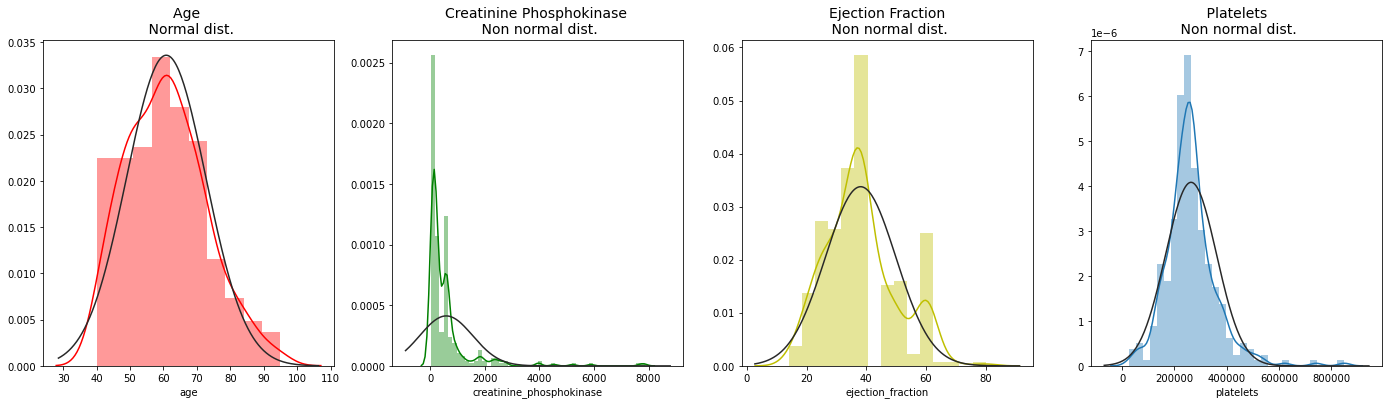

In [55]:
f, ax = plt.subplots(1,4, figsize=(24, 6))

sns.distplot(df['age'],fit=norm, color = 'r',ax = ax[0])
ax[0].set_title('Age \n Normal dist.', fontsize=14)

sns.distplot(df['creatinine_phosphokinase'], fit=norm, color = 'g', ax=ax[1])
ax[1].set_title('Creatinine Phosphokinase \n Non normal dist.', fontsize=14)

sns.distplot(df['ejection_fraction'], fit=norm, color = 'y' ,ax = ax[2])
ax[2].set_title('Ejection Fraction\n Non normal dist.', fontsize=14)

sns.distplot(df['platelets'], fit=norm,ax = ax[3])
ax[3].set_title(' Platelets \n Non normal dist.', fontsize=14)

plt.show()